In [10]:
import torch
from transformers import Wav2Vec2Processor, HubertForCTC
from datasets import load_dataset

processor = Wav2Vec2Processor.from_pretrained("facebook/hubert-large-ls960-ft")
model = HubertForCTC.from_pretrained("facebook/hubert-large-ls960-ft")
    
ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")

input_values = processor(ds[0]["audio"]["array"], return_tensors="pt").input_values  # Batch size 1
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.decode(predicted_ids[0])

# ->"A MAN SAID TO THE UNIVERSE SIR I EXIST"

Some weights of the model checkpoint at facebook/hubert-large-ls960-ft were not used when initializing HubertForCTC: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForCTC were not initialized from the model checkpoint at facebook/hubert-large-ls960-ft and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-

In [6]:
print(ds[0])

{'file': '/home/maximos/.cache/huggingface/datasets/downloads/extracted/e1c4b8db099a0cc9460e1907dc9bac0be7de2b4c41750dcb776780cbebac41b2/dev_clean/1272/135031/1272-135031-0000.flac', 'audio': {'path': '/home/maximos/.cache/huggingface/datasets/downloads/extracted/e1c4b8db099a0cc9460e1907dc9bac0be7de2b4c41750dcb776780cbebac41b2/dev_clean/1272/135031/1272-135031-0000.flac', 'array': array([-0.00018311, -0.00033569, -0.00021362, ..., -0.00323486,
       -0.00402832, -0.00393677]), 'sampling_rate': 16000}, 'text': 'BECAUSE YOU WERE SLEEPING INSTEAD OF CONQUERING THE LOVELY ROSE PRINCESS HAS BECOME A FIDDLE WITHOUT A BOW WHILE POOR SHAGGY SITS THERE A COOING DOVE', 'speaker_id': 1272, 'chapter_id': 135031, 'id': '1272-135031-0000'}


In [12]:
print(input_values.shape)

torch.Size([1, 174160])


In [3]:
import matplotlib.pyplot as plt

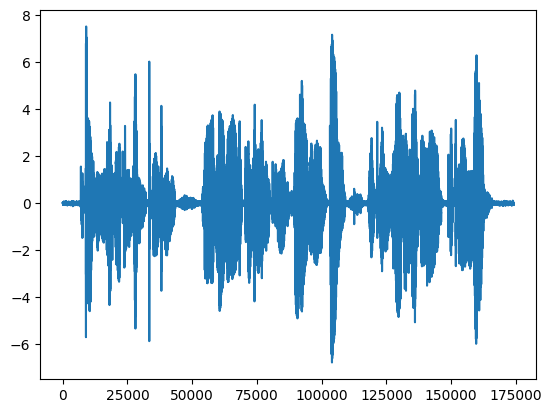

In [4]:
plt.plot(input_values.numpy()[0])

In [11]:
print(transcription)

BECAUSE YOU ARE SLEEPING INSTEAD OF CONQUERING THE LOVELY ROSE PRINCESS HAS BECOME A FIDDLE WITHOUT A BOW WHILE POOR SHAGGY SITS THERE A COOING DOVE
